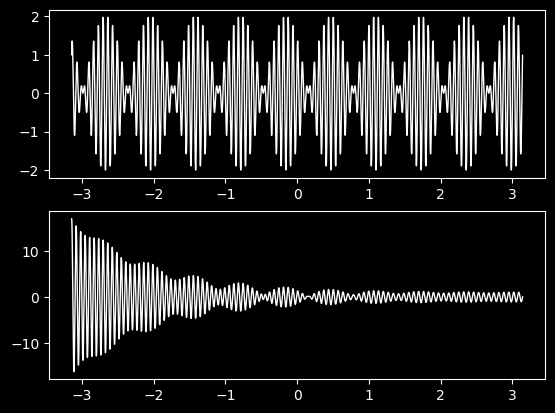

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt1 =plt.subplot(211)
plt2 =plt.subplot(212)
x = np.arange(- np.pi, np.pi, 0.001)
y1 = np.cos(x*100)+ np.sin(x*90)
y2 = np.exp(-0.9*x)*np.cos(x*100)+ np.sin(x*90)

plt1.plot(x, y1, linewidth=1.0, color='w')
plt2.plot(x, y2, linewidth=1.0, color='w')
plt.savefig("./figs/my.png")
plt.show();

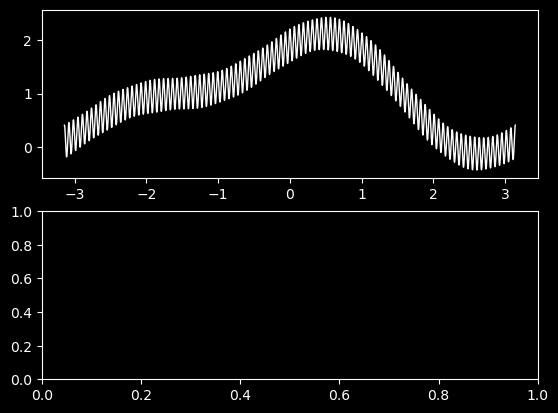

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt1 =plt.subplot(211)
plt2 =plt.subplot(212)
x = np.arange(- np.pi, np.pi, 0.001)
y1 = 1+0.9*np.cos(x) 
y2 = 0.4*np.sin(2*x) 
y3 = 0.3*np.cos(100*x) 
y4 = 0.1*np.cos(90*x) 
y4 = 0.01*np.cos(110*x) 

plt1.plot(x, y1+y2+y3+y4, linewidth=1.0, color='w')
plt.savefig("./figs/my1.png")
plt.show();

### 使用 plt.plot() 的返回值来设置线条属性

`plot` 函数返回一个 `Line2D` 对象组成的列表，每个对象代表输入的一对组合，例如：

- line1, line2 为两个 Line2D 对象

    `line1, line2 = plt.plot(x1, y1, x2, y2)`

- 返回 3 个 Line2D 对象组成的列表

    `lines = plt.plot(x1, y1, x2, y2, x3, y3)`

我们可以使用这个返回值来对线条属性进行设置：

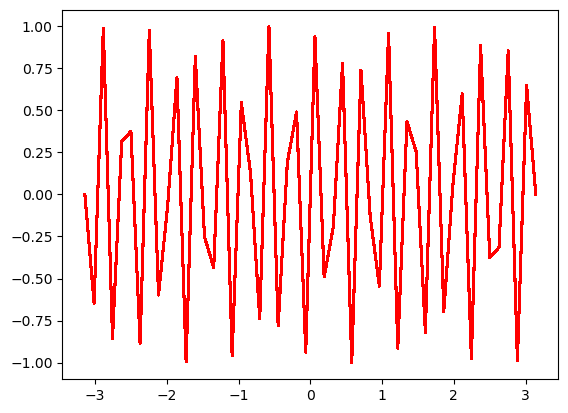

In [4]:
# 加逗号 line 中得到的是 line2D 对象，不加逗号得到的是只有一个 line2D 对象的列表
line, = plt.plot(x, y, 'r-')

# 将抗锯齿关闭
line.set_antialiased(False)

plt.show()

### plt.setp() 修改线条性质

更方便的做法是使用 `plt` 的 `setp` 函数：

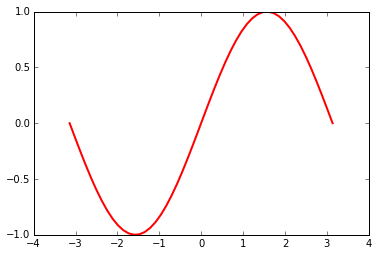

In [10]:
lines = plt.plot(x, y)

# 使用键值对
plt.setp(lines, color='r', linewidth=2.0)

# 或者使用 MATLAB 风格的字符串对
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

plt.show()

可以设置的属性有很多，可以使用 `plt.setp(lines)` 查看 `lines` 可以设置的属性，各属性的含义可参考 `matplotlib` 的文档。

In [11]:
plt.setp(lines)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque)         
  animated: [True | False]         
  antialiased or aa: [True | False]         
  axes: an :class:`~matplotlib.axes.Axes` instance         
  clip_box: a :class:`matplotlib.transforms.Bbox` instance         
  clip_on: [True | False]         
  clip_path: [ (:class:`~matplotlib.path.Path`,         :class:`~matplotlib.transforms.Transform`) |         :class:`~matplotlib.patches.Patch` | None ]         
  color or c: any matplotlib color         
  contains: a callable function         
  dash_capstyle: ['butt' | 'round' | 'projecting']         
  dash_joinstyle: ['miter' | 'round' | 'bevel']         
  dashes: sequence of on/off ink in points         
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' |                   'steps-post']         
  figure: a :class:`matplotlib.figure.Figure` instance         
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none']         
  gid: an 

## 子图

`figure()` 函数会产生一个指定编号为 `num` 的图：

    plt.figure(num)

这里，`figure(1)` 其实是可以省略的，因为默认情况下 `plt` 会自动产生一幅图像。

使用 `subplot` 可以在一副图中生成多个子图，其参数为：

    plt.subplot(numrows, numcols, fignum)

当 `numrows * numcols < 10` 时，中间的逗号可以省略，因此 `plt.subplot(211)` 就相当于 `plt.subplot(2,1,1)`。

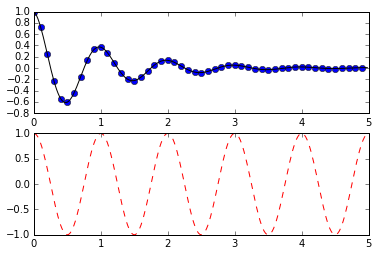

In [12]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

## 图形上加上文字

`plt.hist()` 可以用来画直方图。

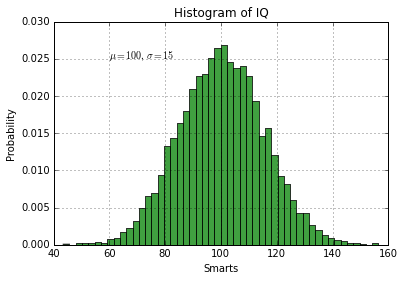

In [13]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

对于这幅图形，我们使用 `xlabel` ，`ylabel`，`title`，`text` 方法设置了文字，其中：

- `xlabel` ：x 轴标注

- `ylabel` ：y 轴标注

- `title` ：图形标题

- `text` ：在指定位置放入文字

输入特殊符号支持使用 `Tex` 语法，用 `$<some Tex code>$` 隔开。

除了使用 `text` 在指定位置标上文字之外，还可以使用 `annotate` 函数进行注释，`annotate` 主要有两个参数：

- `xy` ：注释位置 
- `xytext` ：注释文字位置

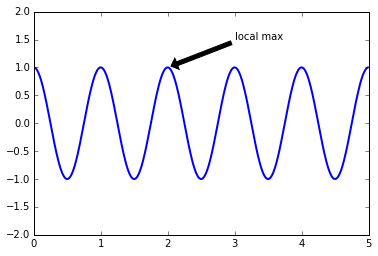

In [14]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()